# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [2]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [5]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [6]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [7]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [6]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [7]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [8]:
hist[4]

0

The `Values` method returns the values:

In [9]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [10]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [11]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

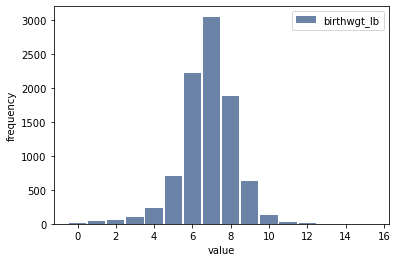

In [12]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [13]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

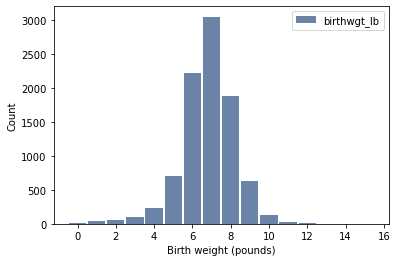

In [14]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [15]:
ages = np.floor(live.agepreg)

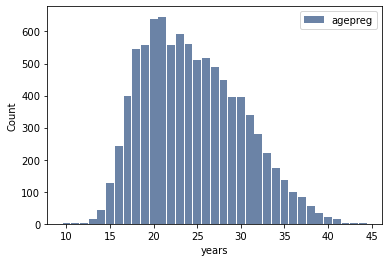

In [16]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

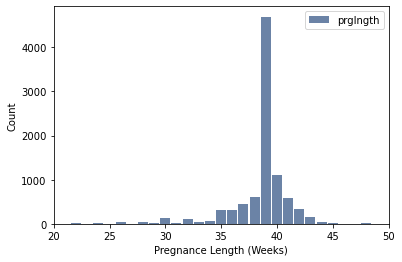

In [22]:
# Solution goes here
hist = thinkstats2.Hist(live.prglngth, label="prglngth")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Pregnance Length (Weeks)", ylabel="Count", xlim=[20,50])

`Hist` provides smallest, which select the lowest values and their frequencies.

In [18]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [24]:
# Solution goes here
for weeks, freq in hist.Largest(10):
    print(f"Weeks:{weeks} ---> {freq} cases")

Weeks:50 ---> 2 cases
Weeks:48 ---> 7 cases
Weeks:47 ---> 1 cases
Weeks:46 ---> 1 cases
Weeks:45 ---> 10 cases
Weeks:44 ---> 46 cases
Weeks:43 ---> 148 cases
Weeks:42 ---> 328 cases
Weeks:41 ---> 587 cases
Weeks:40 ---> 1116 cases


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [25]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

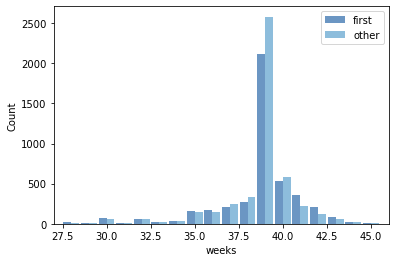

In [26]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [27]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [28]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [33]:
# Solution goes here
assert std == var**0.5, "They are not equal"

Here's are the mean pregnancy lengths for first babies and others:

In [34]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [35]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [27]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [37]:
# Solution goes here

def CohenEffectSize(g1, g2):
    diff = g1.mean() - g2.mean()
    var1, var2 = g1.var(), g2.var()
    n1, n2 = len(g1), len(g2)
    
    pooled_var = (n1*var1 + n2*var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

d = CohenEffectSize(firsts.prglngth, others.prglngth)
print(d)

0.028879044654449883


## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [39]:
# Solution goes here
wgt1, wgt2 = firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()
print(wgt1, wgt2)

7.201094430437772 7.325855614973262


In [30]:
# Solution goes here
d = CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
print(d)

For the next few exercises, we'll load the respondent file:

In [40]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

In [67]:
def plot_hist(dataset, colname):
    hist = thinkstats2.Hist(dataset[colname], label=colname)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=colname, ylabel="Count")
    return hist

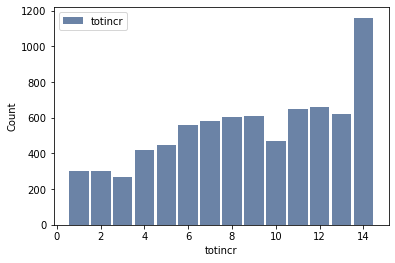

In [68]:
# Solution goes here
totincr = plot_hist(resp, "totincr")

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

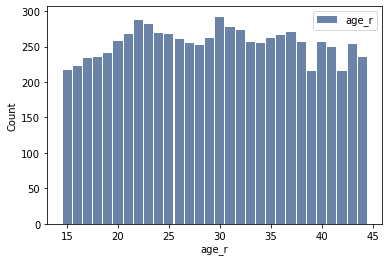

In [69]:
# Solution goes here
age_r = plot_hist(resp, "age_r")

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

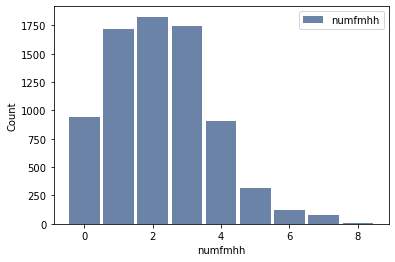

In [70]:
# Solution goes here
numfmhh = plot_hist(resp, "numfmhh")

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

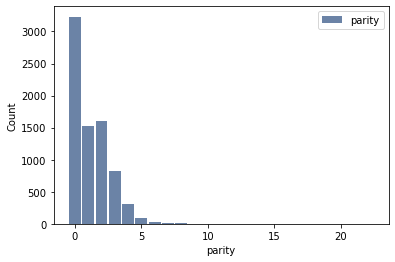

In [71]:
# Solution goes here
parity = plot_hist(resp, "parity")

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [72]:
# Solution goes here
for value, freq in parity.Largest(10):
    print(f"{value} --> {freq} count")

22 --> 1 count
16 --> 1 count
10 --> 3 count
9 --> 2 count
8 --> 8 count
7 --> 15 count
6 --> 29 count
5 --> 95 count
4 --> 309 count
3 --> 828 count


Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

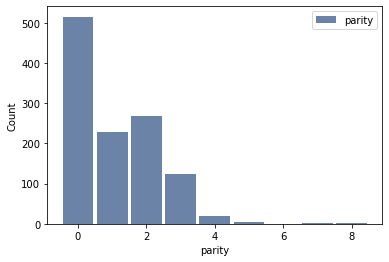

In [73]:
# Solution goes here
high_income = resp[resp.totincr == 14]
high_parity = plot_hist(high_income, "parity") 

Find the largest parities for high income respondents.

In [76]:
# Solution goes here
for val, freq in high_parity.Largest(10):
    print(f"{val} --> {freq} count")

8 --> 1 count
7 --> 1 count
5 --> 5 count
4 --> 19 count
3 --> 123 count
2 --> 267 count
1 --> 229 count
0 --> 515 count


Compare the mean <tt>parity</tt> for high income respondents and others.

In [81]:
# Solution goes here

high_parity = resp[resp.totincr == 14].parity
other_parity = resp[resp.totincr != 14].parity

print(f"High parity mean: {high_parity.mean()}")
print(f"Other parity mean: {other_parity.mean()}")

High parity mean: 1.0758620689655172
Other parity mean: 1.2495758136665125


Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [82]:
# Solution goes here
parity_diff = CohenEffectSize(high_parity, other_parity)
print(parity_diff)

-0.1251185531466061


## Exercise 2.3 
The mode of a distribution is the most frequent value; see
http://wikipedia.org/wiki/Mode_(statistics). 


As a more challenging exercise, write a function called `AllModes` that takes a Hist returns
a list of value-frequency pairs in descending order of frequency.


In [98]:
def AllModes(hist):
    hist_list = [(val, freq) for val, freq in hist.GetDict().items()]
    return hist_list

In [100]:
inc_list = AllModes(totincr)
print(inc_list)

[(14, 1160), (12, 658), (11, 647), (13, 623), (9, 607), (8, 606), (7, 583), (6, 559), (10, 468), (5, 445), (4, 421), (2, 301), (1, 299), (3, 266)]


In [101]:
parity_hist = thinkstats2.Hist(resp.parity, label="parity")
parity_list = AllModes(parity_hist)
print(parity_list)

[(0, 3230), (2, 1603), (1, 1519), (3, 828), (4, 309), (5, 95), (6, 29), (7, 15), (8, 8), (10, 3), (9, 2), (22, 1), (16, 1)]
